In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/emily/Documents/modB data/PM/project/Womens Clothing/Womens_Clothing.csv',sep=",",
                  names=['index','Clothing_ID','Age','Title','Review_Text','Rating','Recommended_IND','Positive_Feedback_Count',
                         'Division_Name','Department_Name','Class_Name'],skiprows=1, header=None)
df['Department_Name'] = df['Department_Name'].fillna('')
dfNew=df.loc[df.Department_Name.apply(lambda cat: 'Tops' in cat)]
dfNew.head()

,index,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
17,17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses
20,20,847,33,"Cute, crisp shirt","If this product was in petite, i would get the...",4,1,2,General,Tops,Blouses


In [5]:
df = dfNew[['Review_Text','Rating','Recommended_IND','Class_Name','Age']]
df.head()

,Review_Text,Rating,Recommended_IND,Class_Name,Age
4,This shirt is very flattering to all due to th...,5,1,Blouses,47
6,I aded this in my basket at hte last mintue to...,5,1,Knits,39
7,"I ordered this in carbon for store pick up, an...",4,1,Knits,39
17,Took a chance on this blouse and so glad i did...,5,1,Blouses,41
20,"If this product was in petite, i would get the...",4,1,Blouses,33


In [6]:
# fill NA values by space
df['Review_Text'] = df['Review_Text'].fillna('')

# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word_Counts'] = df['Review_Text'].apply(wordcounts)
df.head()

,Review_Text,Rating,Recommended_IND,Class_Name,Age,Word_Counts
4,This shirt is very flattering to all due to th...,5,1,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."
6,I aded this in my basket at hte last mintue to...,5,1,Knits,39,"{'aded': 1, 'all': 1, 'am': 1, 'and': 3, 'as':..."
7,"I ordered this in carbon for store pick up, an...",4,1,Knits,39,"{'already': 1, 'also': 1, 'always': 1, 'and': ..."
17,Took a chance on this blouse and so glad i did...,5,1,Blouses,41,"{'about': 1, 'and': 3, 'blouse': 2, 'can': 1, ..."
20,"If this product was in petite, i would get the...",4,1,Blouses,33,"{'130lb': 1, 'and': 1, 'back': 1, 'be': 1, 'bo..."


Selected Words
love            3980
great           2731
super            699
happy            309
glad             271
disappointed     231
bad              166
amazing          161
wonderful        119
stunning         101
dtype: int64

Class Names
Knits         4843
Blouses       3097
Sweaters      1428
Fine gauge    1100
Name: Class_Name, dtype: int64


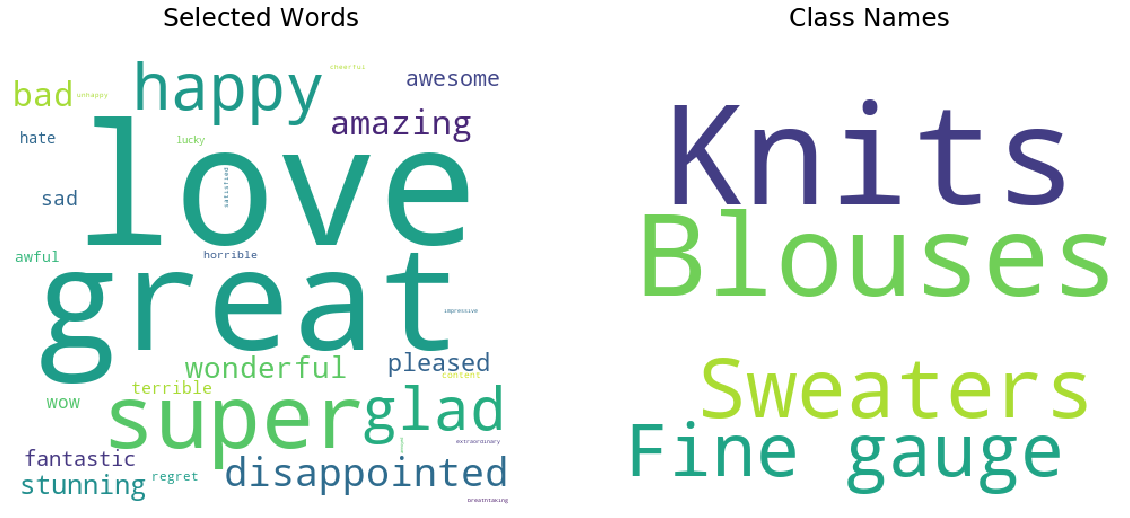

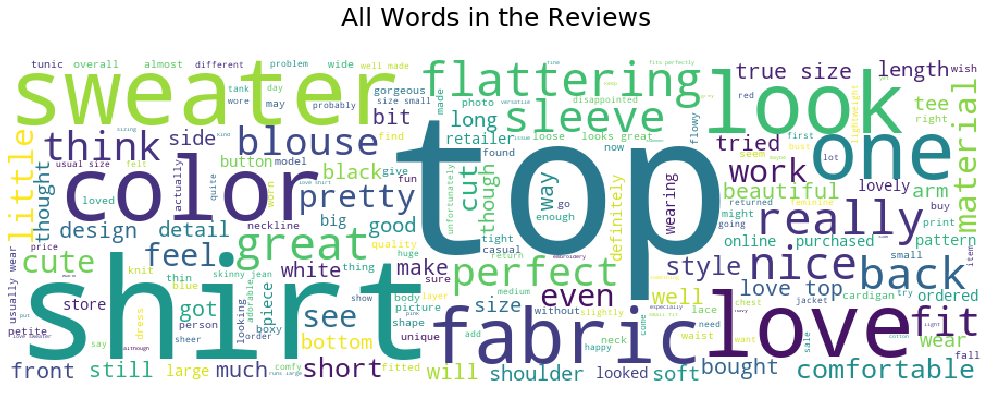

In [7]:
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word_Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:10])

print('\nClass Names')
print(df['Class_Name'].fillna("Empty").value_counts().iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class_Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review_Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

In [8]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
#df = df[df['Rating'] != 3]
df['SentimentTF'] = df['Rating'] >=4
df.head()

,Review_Text,Rating,Recommended_IND,Class_Name,Age,Word_Counts,SentimentTF
4,This shirt is very flattering to all due to th...,5,1,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
6,I aded this in my basket at hte last mintue to...,5,1,Knits,39,"{'aded': 1, 'all': 1, 'am': 1, 'and': 3, 'as':...",True
7,"I ordered this in carbon for store pick up, an...",4,1,Knits,39,"{'already': 1, 'also': 1, 'always': 1, 'and': ...",True
17,Took a chance on this blouse and so glad i did...,5,1,Blouses,41,"{'about': 1, 'and': 3, 'blouse': 2, 'can': 1, ...",True
20,"If this product was in petite, i would get the...",4,1,Blouses,33,"{'130lb': 1, 'and': 1, 'back': 1, 'be': 1, 'bo...",True


In [9]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
#from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review_Text"]= df["Review_Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [12]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

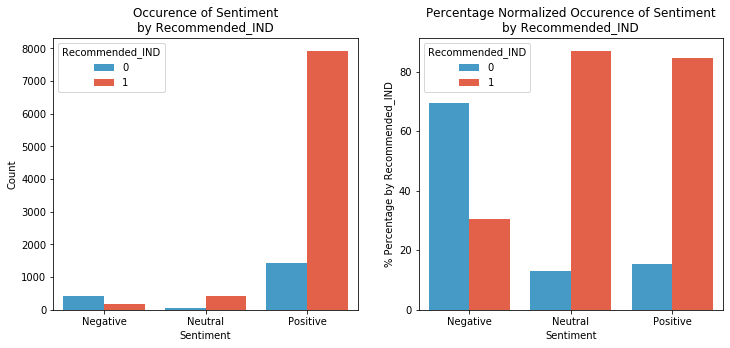

In [13]:
huevar = "Recommended_IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

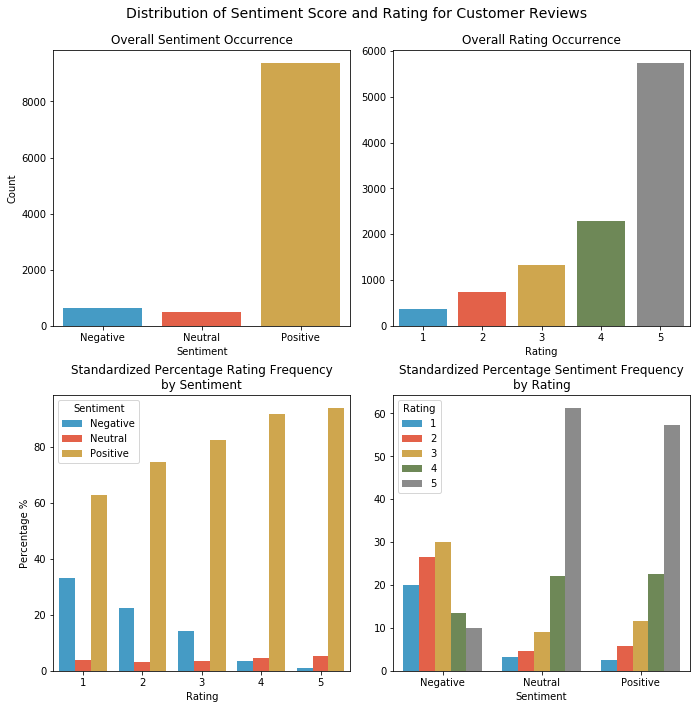

In [14]:
f, axes = plt.subplots(2,2, figsize=[10,10])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Rating Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Rating Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Rating")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

In [15]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

In [16]:
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
#stop_words = [t for t in tokens if t in stopwords.words('english')]

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [t for t in words if t not in stopwords.words('english')] #3
    words = [ps.stem(w) for w in words] #4
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


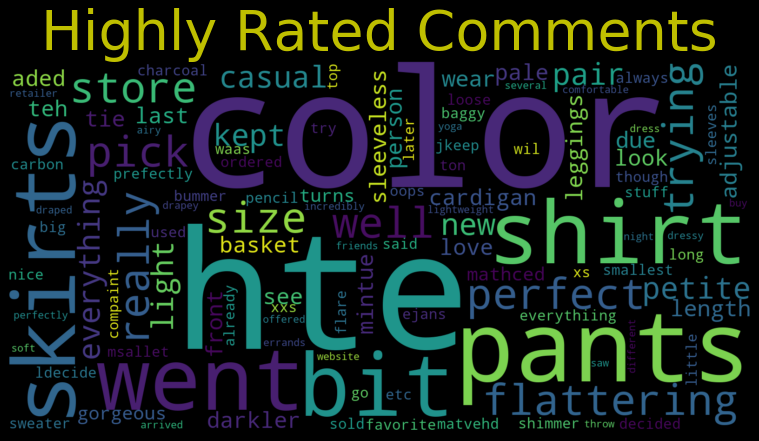

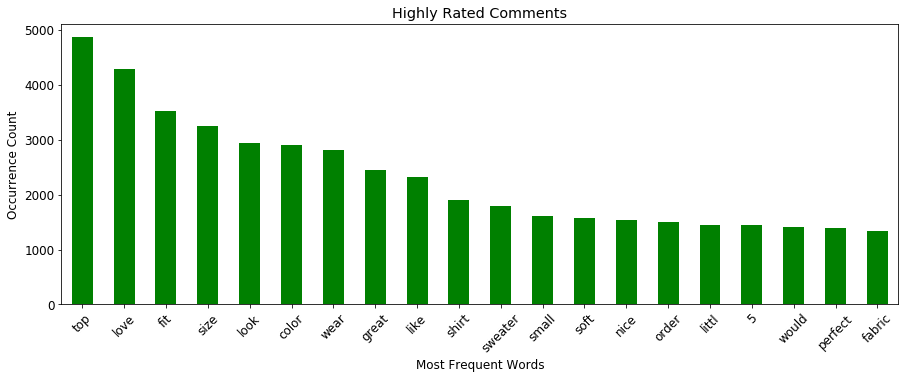

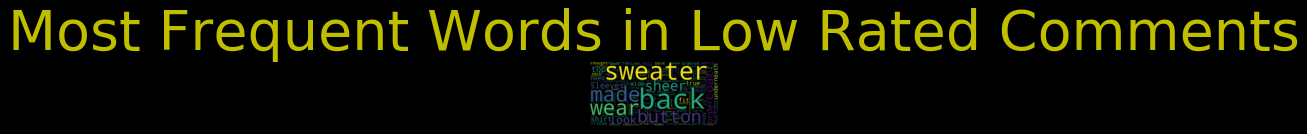

In [17]:
# Highly Rated
title ="Highly Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) >= 4]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                )

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                )

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

In [18]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
#df = df[df['Rating'] != 3]
#df=df.loc[df.Rating.apply(lambda x: 3 not in x)]
df = df.drop(df[df.Rating ==3].index)
df['SentimentR'] = df['Rating'] >=4
df['SentimentR'].value_counts()

True     8030
False    1114
Name: SentimentR, dtype: int64

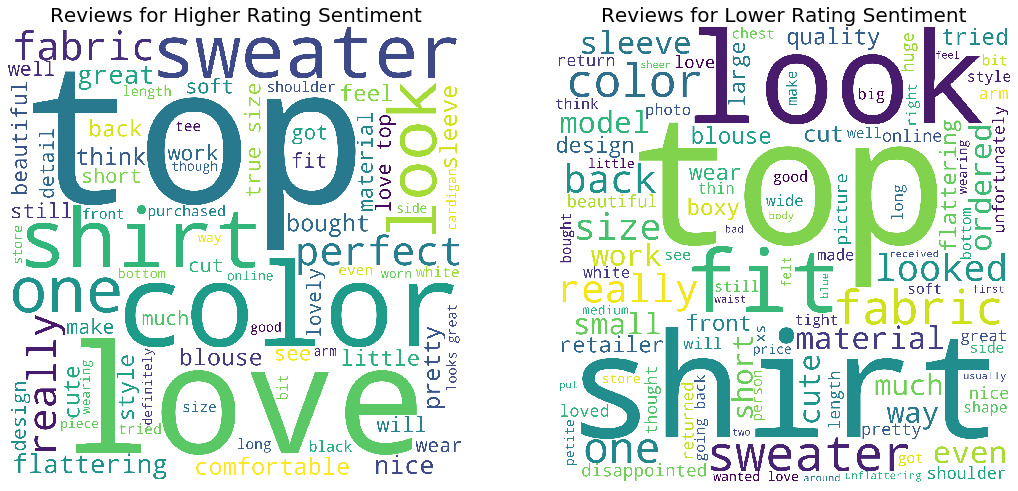

In [19]:
mlreview = ' '.join([text for text in df['Review_Text'][df['SentimentR']==True]])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Higher Rating Sentiment', fontsize = 20)

pyreview = ' '.join([text for text in df['Review_Text'][df['SentimentR']==False]])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Lower Rating Sentiment', fontsize = 20)

plt.show()

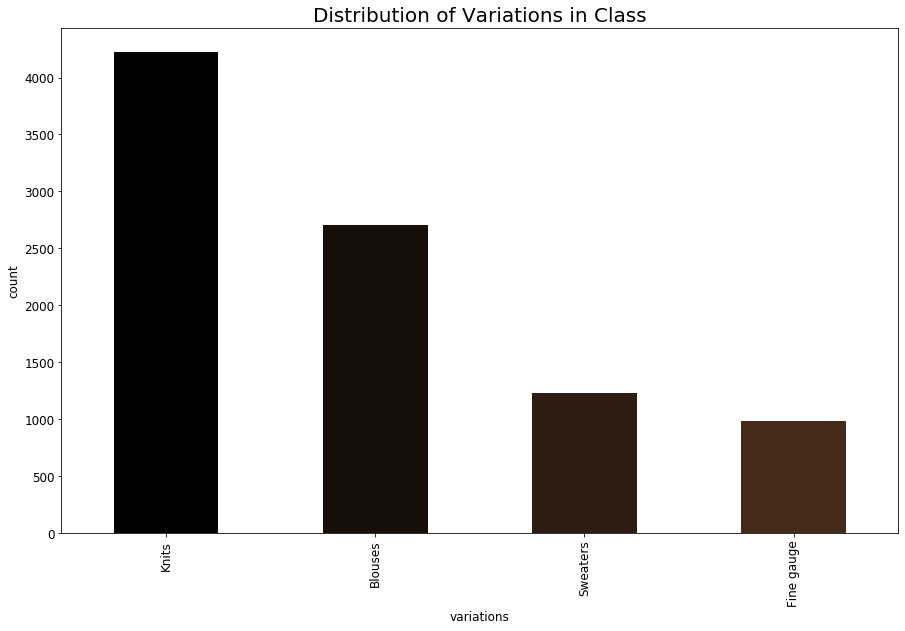

In [20]:
color = plt.cm.copper(np.linspace(0, 1, 15))
df['Class_Name'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Class', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
#df['Review_Text'] = [x.split(',') for x in df['Review_Text']]
count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(df['Review_Text'])
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [22]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

elbows
classically
everyday
between
inside
swish
generous
factoring
galleria
peplums


In [23]:
first_topic = LDA.components_[0]

In [24]:
top_topic_words = first_topic.argsort()[-10:]

In [25]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

in
great
for
with
to
the
is
this
and
it


In [26]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['in', 'great', 'for', 'with', 'to', 'the', 'is', 'this', 'and', 'it']


Top 10 words for topic #1:
['are', 'top', 'very', 'of', 'love', 'in', 'this', 'is', 'and', 'the']


Top 10 words for topic #2:
['was', 'on', 'but', 'in', 'to', 'this', 'is', 'and', 'it', 'the']




In [27]:
topic_values = LDA.transform(doc_term_matrix)

In [29]:
a = topic_values.argmax(axis=1)

In [30]:
df['Topic'] = a

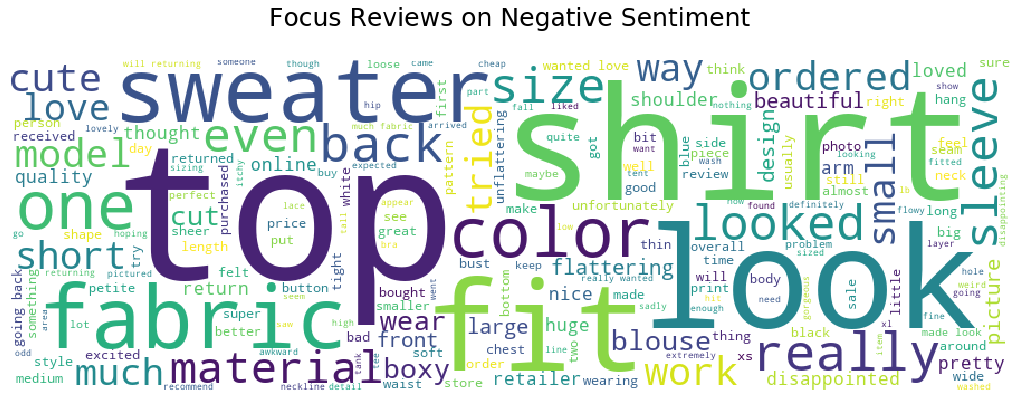

In [31]:
tp = df['Review_Text'][
  (df['SentimentR'] == False)&
  ((df['Topic'] == 0) |
  (df['Topic'] == 2))
]
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(tp))
plt.imshow(wordcloud)
plt.title('Focus Reviews on Negative Sentiment\n',size=25)
plt.axis('off')
plt.show()

In [32]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['Review_Text'])
y_train = train_data['SentimentR']
X_test = vectorizer.transform(test_data['Review_Text'])
y_test = test_data['SentimentR']

In [33]:
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2.head(20)

,Review_Text,Rating,Recommended_IND,Class_Name,Age,Word_Counts,SentimentTF,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,SentimentR,Topic,Logistic Regression
10874,I was sad that this was only online because i ...,4,1,Knits,25,"{'afraid': 1, 'an': 2, 'and': 2, 'antrho': 1, ...",True,0.7871,0.903,0.020,0.078,Positive,True,2,True
2803,"Looks great on the model, but in actuality the...",1,0,Knits,34,"{'actuality': 1, 'all': 1, 'alteration': 1, 'a...",False,0.9674,0.792,0.010,0.197,Positive,False,2,False
2804,One of the best retailer pieces i have ever pu...,5,1,Knits,43,"{'and': 3, 'best': 1, 'both': 1, 'bought': 1, ...",True,0.9555,0.618,0.000,0.382,Positive,True,0,True
17061,This sweater was just what i was looking for. ...,5,1,Sweaters,20,"{'add': 1, 'all': 1, 'and': 2, 'are': 2, 'as':...",True,0.1997,0.942,0.019,0.039,Positive,True,2,True
14221,This is really my favorite top! i wear it all ...,5,1,Knits,37,"{'all': 1, 'and': 3, 'as': 1, 'beautiful': 1, ...",True,0.9866,0.605,0.039,0.355,Positive,True,0,True
5610,Great basic but with a little something specia...,5,1,Knits,33,"{'all': 1, 'around': 1, 'basic': 1, 'but': 1, ...",True,0.9122,0.436,0.000,0.564,Positive,True,0,True
19084,My personal opinion is that i am not a fan of ...,2,0,Knits,27,"{'am': 1, 'and': 1, 'as': 2, 'boxy': 1, 'but':...",False,0.6477,0.724,0.069,0.207,Positive,False,2,False
22787,,5,1,Knits,34,{},True,0.0000,0.000,0.000,0.000,Neutral,True,0,True
1356,I ordered this blouse online bc i couldn't fin...,2,0,Blouses,40,"{'already': 1, 'and': 1, 'bc': 1, 'blouse': 1,...",False,-0.0986,0.904,0.053,0.043,Negative,False,2,False
472,I love this top! it's easily both day and nigh...,5,1,Blouses,68,"{'all': 1, 'and': 1, 'boo': 1, 'both': 1, 'day...",True,0.9098,0.590,0.000,0.410,Positive,True,1,True


In [35]:
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
def f(row):
    if row['Age'] >= 18 and row['Age'] < 29:
        val = '18-29'
    elif row['Age'] >= 30 and row['Age'] < 39:
        val = '30-39'
    elif row['Age'] >= 40 and row['Age'] < 49:
        val = '40-49'
    elif row['Age'] >= 50 and row['Age'] < 59:
        val = '50-59'
    else:
        val = '60-99'
    return val

df['Age_Group'] = df.apply(f, axis=1)

In [38]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

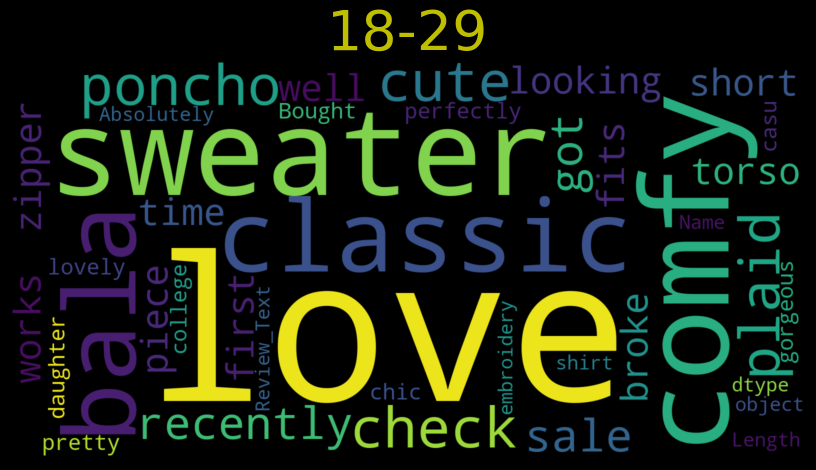

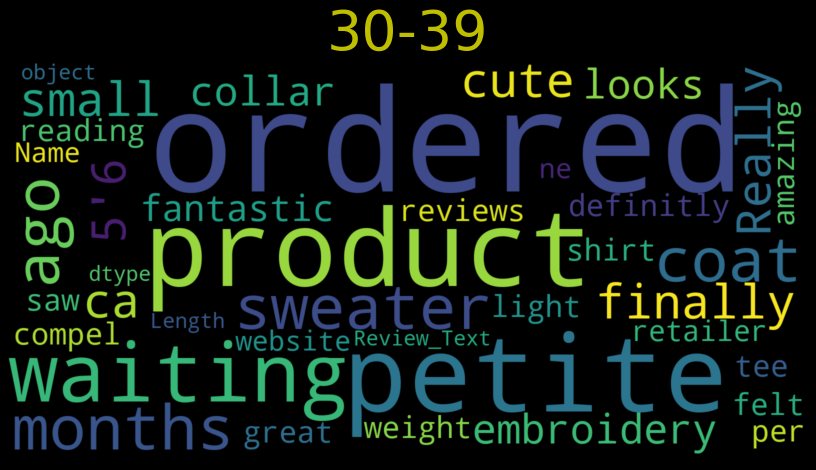

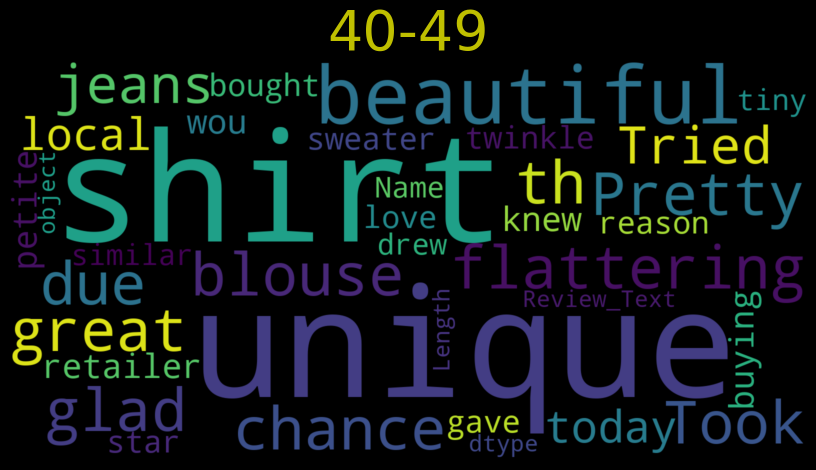

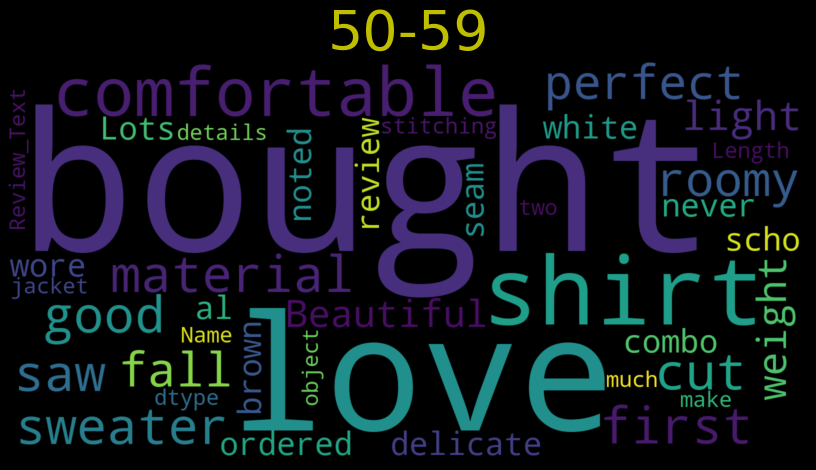

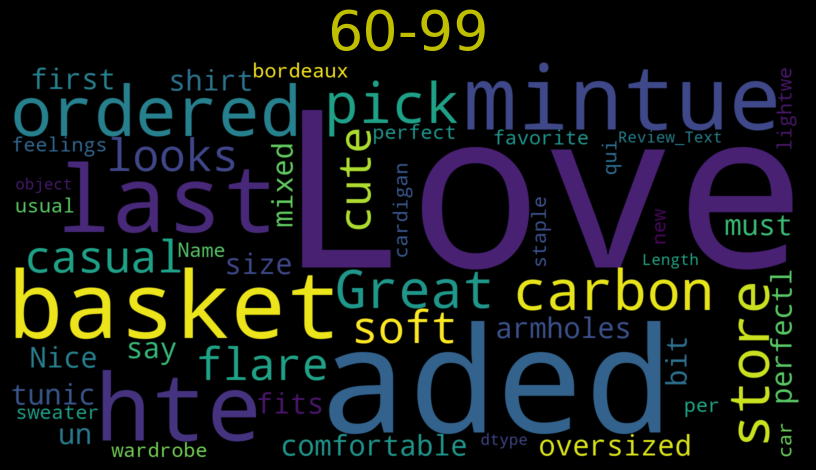

In [39]:
age_set = df['Age_Group'][df['Age_Group'].notnull()].unique()
age_set.sort()

def cloud_by_age(data, age, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data['Age_Group'][data['Age_Group'].notnull()].unique())]
                   + ["top","tops"])
 # Cloud
    cloud(text= data["Review_Text"][data[age]== subclass],
          title="{}".format(subclass),
          stopwords= new_stop,
          size = (10,6))
    

# Plot
cloud_by_age(df, 'Age_Group', age_set[0])
cloud_by_age(df, 'Age_Group', age_set[1])
cloud_by_age(df, 'Age_Group', age_set[2])
cloud_by_age(df, 'Age_Group', age_set[3])
cloud_by_age(df, 'Age_Group', age_set[4])

In [41]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
#stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words
# Pre-Processing

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()
df["Review_Text"]= df["Review_Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review_Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [42]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

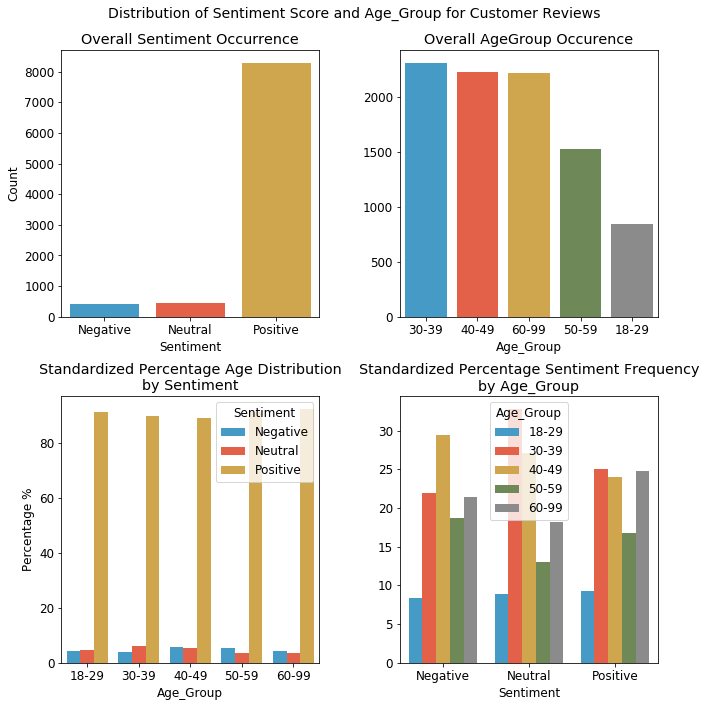

In [43]:
f, axes = plt.subplots(2,2, figsize=[10,10])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Age_Group", data=df, order=df['Age_Group'].value_counts().index,ax=axes[0,1])
axes[0,1].set_xlabel("Age_Group")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall AgeGroup Occurence")

percentstandardize_barplot(x="Age_Group",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Age_Group")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Age Distribution\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Age_Group",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Age_Group")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Age_Group for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

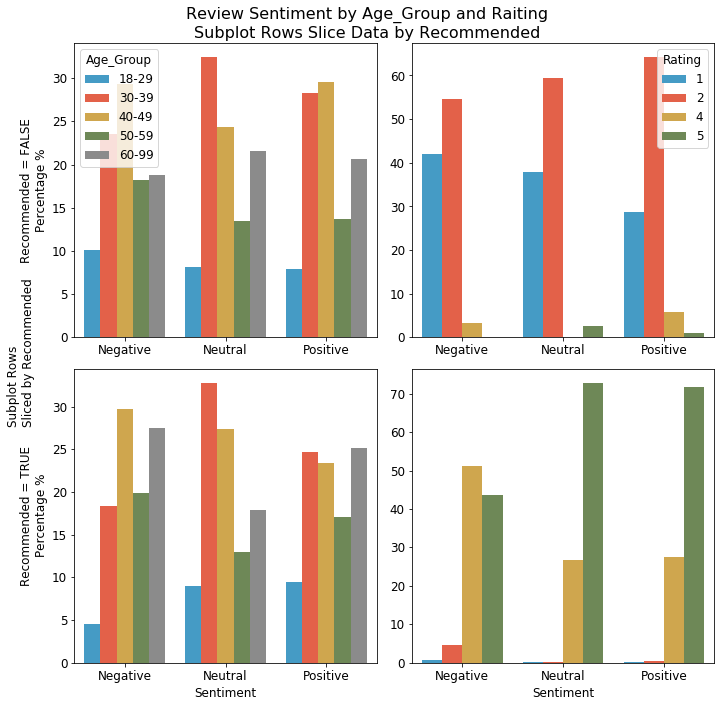

In [44]:
# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Age_Group"
rowvar = "Recommended_IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Age_Group and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
##Naive Bayes classifier for multinomial models
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [stemmer.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

df['Review_Text'].head(5).apply(text_process)

4     [shirt, flatter, due, adjust, front, tie, perf...
6     [ade, basket, hte, last, mintu, see, would, lo...
7     [order, carbon, store, pick, ton, stuff, alway...
17    [took, chanc, blous, glad, wasnt, crazi, blous...
20    [product, petit, would, get, petit, regular, l...
Name: Review_Text, dtype: object

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_predict_recommend=df['Review_Text']
y_recommend=df['Recommended_IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)

In [49]:
print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 159  197]
 [  38 2350]]


              precision    recall  f1-score   support

           0       0.81      0.45      0.58       356
           1       0.92      0.98      0.95      2388

    accuracy                           0.91      2744
   macro avg       0.86      0.72      0.76      2744
weighted avg       0.91      0.91      0.90      2744



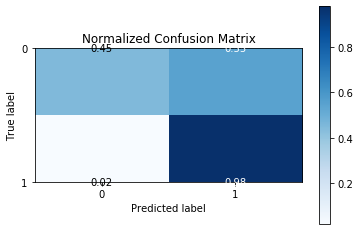

In [51]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,nb.predict(X_test), normalize=True)
plt.show()

In [52]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
predict_rf_o=rf.predict(X_test)

In [53]:
print(confusion_matrix(y_test, predict_rf_o))
print('\n')
print(classification_report(y_test, predict_rf_o))

[[  40  316]
 [   3 2385]]


              precision    recall  f1-score   support

           0       0.93      0.11      0.20       356
           1       0.88      1.00      0.94      2388

    accuracy                           0.88      2744
   macro avg       0.91      0.56      0.57      2744
weighted avg       0.89      0.88      0.84      2744



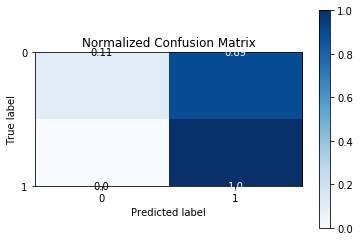

In [54]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,rf.predict(X_test), normalize=True)
plt.show()

In [56]:
##Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import eli5

Using TensorFlow backend.


In [57]:
vect = TfidfVectorizer()
vect.fit(df["Review_Text"])
X = vect.transform(df["Review_Text"])

In [58]:
y = df["Recommended_IND"].copy()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(metrics.accuracy_score( y_train,model.predict(X_train))))
print("Train Set ROC: {}\n".format(metrics.roc_auc_score(y_train,model.predict(X_train))))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(y_valid,model.predict(X_valid))))
print("Validation Set ROC: {}".format(metrics.roc_auc_score( y_valid,model.predict(X_valid))))

Train Set Accuracy: 0.9332877648667123
Train Set ROC: 0.7433914745535536

Validation Set Accuracy: 0.9158009841443412
Validation Set ROC: 0.6782967776127725


In [59]:
print(metrics.classification_report(y_valid,model.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.89      0.36      0.52       226
           1       0.92      0.99      0.95      1603

    accuracy                           0.92      1829
   macro avg       0.90      0.68      0.73      1829
weighted avg       0.91      0.92      0.90      1829



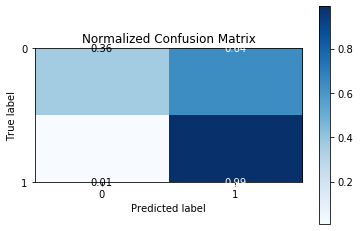

In [60]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( y_valid,model.predict(X_valid), normalize=True)
plt.show()

In [61]:
target_names = ["Not Recommended","Recommended"]
eli5.show_weights(model, vec=vect, top=100,
                  target_names=target_names)

Weight?,Feature
+4.138,love
+3.617,great
+3.550,little
+2.784,perfect
+2.740,with
+2.694,soft
+2.468,comfortable
+2.289,bit
+2.273,jeans
+2.230,size


In [62]:
import random
for iteration in range(15):
    samp = random.randint(1,df.shape[0])
    print("Real Label: {}".format(df["Recommended_IND"].iloc[samp]))
    display(eli5.show_prediction(model,df["Review_Text"].iloc[samp], vec=vect,
                         target_names=target_names))

Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 0


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 0


In [63]:
#!!this chunk will turn dataframe to list
ratings = df['SentimentR'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Sentiment')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

In [ ]:
#!!this chunk will turn dataframe to list
'''
topic = df['Topic'][df['SentimentR']==False].value_counts()

label_topic =topic.index
size_topic = topic.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

topic_piechart = go.Pie(labels = label_topic,
                         values = size_topic,
                         marker = dict(colors = colors),hole = 0.3)

df = [topic_piechart]

layout = go.Layout(
           title = 'Topic Distribution of Sentiment')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)
'''